In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
#from numba import jit
%matplotlib inline

<strong> Chapters 29, 31 </strong>: So, before we get started, let's revisit the Koch curve so that we can get properly reaquainted with geometry.  So first, by a point ${\bf P}$ we mean 

$$
{\bf P} = \left(P_{x},P_{y}\right)
$$

Note, when we write this, we are thinking of the following figure 

<img src="QP_plane.png" alt="Drawing" style="width: 200px;"/>

So with this is in mind, we could just as well think of a point as a vector from the origin to the point, say $\vec{{\bf OP}}$ where 

$$
\vec{{\bf OP}} = P_{x}\hat{{\bf i}} + P_{y}\hat{{\bf j}}
$$

so when you hear me be somewhat glib about describing 'a point as a vector', this is why.  The point representation and the vector representation contain the same information, just written in slightly different forms.  However, when we talk about 'length', we talk about the length of a vector, i.e. 

$$
\left|\vec{{\bf OP}} \right| = \sqrt{P_{x}^{2} + P_{y}^{2}}.
$$

We really should not talk about the length of a point, but because we are lazy, you will see people write 

$$
\left|{\bf P} \right| = \sqrt{P_{x}^{2} + P_{y}^{2}},
$$

though they may defend themselves by saying that by ${\bf P}$, they meant the vector, not the point.  Obviously :)

Now let's talk about a confusing point.  First, we introduce a second point say ${\bf Q}=(Q_{x},Q_{y})$. Now we can talk about the vector from ${\bf P}$ to ${\bf Q}$, say $\vec{{\bf PQ}}$, which is  

$$
\vec{{\bf PQ}} = \vec{{\bf OQ}} - \vec{{\bf OP}} = (Q_{x}-P_{x})\hat{{\bf i}} + (Q_{y}-P_{y})\hat{{\bf j}}.
$$

Now this vector certainly stretches from the point ${\bf P}$ to the point ${\bf Q}$.  But this vector can be put anywhere in the plane, and it is the *same* vector.  So a vector doesn't necessarily have to stay attached to any one point.  

On the other hand, a *line segment* is between two particular points.  We denote the line segment between ${\bf P}$ and ${\bf Q}$ as $\overline{{\bf PQ}}$.  The length of the line segment is the length of the vector $\vec{{\bf PQ}}$, and we would even denote this as 

$$
\left|\overline{{\bf PQ}} \right| = \left|\vec{{\bf PQ}} \right|=\sqrt{(Q_{x}-P_{x})^{2}+(Q_{y}-P_{y})^{2}}.
$$

Now, an interesting example is describing all the points on a line segment.  Here is where things can get a little messy, but this is also where we need to be comfortable thinking about points and vectors as basically being the same thing.  

<img src="QP_plane_line_seg.png" alt="Drawing" style="width: 200px;"/>

Now let $0\leq t \leq 1$.  Let's think about where we can put the vectors $t \vec{{\bf PQ}}$.  Since these vectors are just scalar multiples of $\vec{\bf PQ}$, they are parallel to $\vec{{\bf PQ}}$, which means they point in the same direction from the points ${\bf P}$ to ${\bf Q}$.  So, to describe the points ${\bf P}_{t}$ in the figure above, really it makes more sense to use the vectors $\vec{{\bf OP}}_{t}$ which we define to be 

\begin{align*}
\vec{{\bf OP}}_{t} = & \vec{{\bf OP}} + t \vec{{\bf PQ}} \\
=& \vec{{\bf OP}} + t (\vec{{\bf OQ}}-\vec{{\bf OP}}) \\
=& (1-t)\vec{{\bf OP}} + t \vec{{\bf OQ}}, ~ 0\leq t \leq 1.
\end{align*}

Now, it is at this point in the book, and in many other places, that will just see people write 

$$
{\bf P}_{t} = (1-t){\bf P} +t{\bf Q}. 
$$

In some sense, it is not technically correct, but again, the point and vector representation do not contain fundamentally different information, and it becomes much easier to write things without constantly referring back to the origin point ${\bf O}$.  

Now, at this point, let's say we want to use Python to help us deal with points.  While we can use approaches like

In [ ]:
P = np.array([1.,0.])

This is not always the best way to do this.  As we see from above, while this may be effective for thinking about a few points at a time (see our discussion of the Koch Curve), what if we want to consider arbitrary numbers of points, such as the points along a line segment.  Likewise, what if we also want to think about building lines of points?  And then what if we want to think about shapes in the planes such as various polygons, which are made of lines, which are made of points?  See where this is going?  

Thus, what we really want to do is build a series of new 'Types', or what are called 'Classes'.  This is equivalent to introducing generalizations of 'Int', 'Float', and 'Str'.  Each class will have its own properties and rules for how different instantiations of the class, or *objects*, interact.  Okay, now it's time for an example.  Let's build a point class.  We do this in the following way.  

In [3]:
class point():
    def __init__(self,a,b): # Constructor function
        self.xcoord = a # Self now has a x-coordinate with value x
        self.ycoord = b # Self now has a y-coordinate with value y

So let's see how this works.  What we have above is a class 'point' with one interior function, the *constructor*, whose job it is to take in values $x$ and $y$ and assign them to a variable denoted by 'self'.  Let me show you what this means. 

In [4]:
P = point(2.3,4.7) # We call the class 'point' to make the object, P, with data x=2.3 and y=4.7.
print P.xcoord
print P.ycoord
print type(P)

2.3
4.7
<type 'instance'>


So what we have done here is created an instantiation of the class, or an *object*, and assigned it the *data*, $x$ and $y$.  To retrieve this data, we use `P.x` or `P.y`.  Note, throughout the semester, when you have been writing things like `np.linspace(0,1,10)`, you have in effect been calling attributes of a class associated with Numpy.  

Now what else can we do with this?  Well maybe we would like to know how far a point is away from the origin, i.e. we want to know the length of that associated line segment.  To do this, we would modify our class in the following way.

In [10]:
class point():
    def __init__(self,x,y): # Constructor function
        self.x = x # Self now has a x-coordinate with value x
        self.y = y # Self now has a y-coordinate with value y
        
    def length(self):
        return ((self.x)**2. + (self.y)**2.)**(.5)

So now if we write the following

In [11]:
P = point(3.,4.) # We call the class 'point' to make the object, P, with data x and y.
print P.x
print P.y
print P.length()

3.0
4.0
5.0


Now that we have this class, we can start building new types of functions to take advantage of this.  Say for example we want to *add* points.  Well, now we can define the function

In [12]:
def p_add(P,Q): # Here we suppose that P and Q are objects associated with the point class.
    xval = P.x + Q.x
    yval = P.y + Q.y
    W = point(xval,yval)
    return W

So, now we can do the following

In [14]:
P = point(2.,3.)
Q = point(4.,5.)
W = p_add(P,Q)
print W.x
print W.y
print W.length()

6.0
8.0
10.0


But this does not allow us to write things like `P+Q` or `Q-P`, which we would kind of like to do if you think about it.  To do this then, we use what is called *operator overloading*, i.e. we *overload* the operators '+' and '-' in order to deal with the new type 'point'.  This is done in the following way

In [4]:
class point():
    def __init__(self,x,y): # Constructor function
        self.x = x # Self now has a x-coordinate with value x
        self.y = y # Self now has a y-coordinate with value y
        
    def __str__(self): # Overload the definition of strings so we can print points in a nice way
        return "({0},{1})".format(self.x,self.y)
        
    def __add__(self,other): # Overload addition so we can add points 
        X = self.x + other.x
        Y = self.y + other.y
        return point(X,Y)
    
    def __sub__(self,other): # Overload subtraction so we can subtract points
        X = self.x - other.x
        Y = self.y - other.y
        return point(X,Y)
        
    def __mul__(self,scal):
        X = scal*self.x
        Y = scal*self.y
        return point(X,Y)    
        
    def __rmul__(self,scal):
        X = self.x*scal
        Y = self.y*scal
        return point(X,Y)
    
    def __div__(self,scal):
        X = self.x/scal
        Y = self.y/scal
        return point(X,Y)
            
    def length(self):
        return ((self.x)**2. + (self.y)**2.)**(.5)

Thus now we can do 

In [2]:
P = point(2.,3.)
Q = point(4.,5.)
W = P+Q
Y = Q-P
T = 3.4*P # rmul addresses this case
Tal = P*3.4 # mul addresses this case
Z = P/3.4
print W
print Y 
print T
print Tal
print Z

(6.0,8.0)
(2.0,2.0)
(6.8,10.2)
(6.8,10.2)
(0.588235294118,0.882352941176)


So, let's revisit the Koch Curve code and see if we can make life a little easier using our new class.  

In [6]:
def k_plot(P,Q,pts,nlev):
    if nlev > 0:
        
        # Compute the new points A, B, and C from the endpoints of the line segment P and Q
        d = Q - P
        dperp = point(-d.y,d.x)
        A = P + d/3.
        B = (P+Q)/2. + dperp/(2.*np.sqrt(3))
        C = P + 2.*d/3.
        # Recurse down to the next level and repeat the process over again.
        
        ind = pts.index(Q)
        pts.insert(ind,C)
        pts.insert(ind,B)
        pts.insert(ind,A)
        
        k_plot(P,A,pts,nlev-1) # Repeat process between P and A
        k_plot(A,B,pts,nlev-1) # Repeat process between A and B
        k_plot(B,C,pts,nlev-1) # Repeat process between B and C
        k_plot(C,Q,pts,nlev-1) # Repeat process between C and Q   

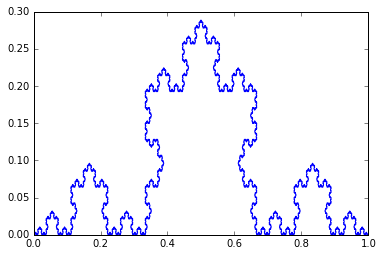

In [7]:
P = point(0.,0.)
Q = point(1.,0.)
pts = [P,Q] # Initialize pts with the points P and Q
k_plot(P,Q,pts,6)
ptsx = [pt.x for pt in pts]
ptsy = [pt.y for pt in pts]
plt.plot(ptsx,ptsy)

Okay, so now that we have a point class, we might want to build a class for line segments.  So first we need to think, what makes a line segment?  Well, the answer is two points, say ${\bf P}_{1}$ and ${\bf P}_{2}$.  So the necessary data to create an instance of a line segment is two points.  See if you can sketch out what a constructor this would be.  

In [ ]:
class lineseg():
    def __init__(self,P1,P2):
        self.st = P1
        self.end = P2

Okay, now that we have a constructor, what other attributes might we want in our class?  Maybe we want to be able to determine the corresponding rise and run of the line?  How would you do this?  How would you add the length as an attribute?  

In [5]:
class lineseg():
    def __init__(self,P1,P2):
        self.P1 = P1
        self.P2 = P2
        
    def dx(self):
        return (self.P2.x - self.P1.x)
    def dy(self):
        return (self.P2.y - self.P1.y)
    def length(self):
        return np.sqrt( (self.dx())**2. + (self.dy())**2. )

Now make up some tests and make sure these things do what you think they should.

In [6]:
thfr = lineseg(point(0.,0.),point(3.,4.))
print thfr.dx()
print thfr.dy()
print thfr.length()

3.0
4.0
5.0


Okay, the next thing we are going to get into is using our new class to answer some basic questions in geometry.  The one we will start with is, how do we tell if two points, say ${\bf C}$ and ${\bf D}$, are on the same side of a line segment, say $\overline{{\bf AB}}$?  To do this, we need to make use of the cross product between two planar vectors, say $\vec{{\bf P}}$ and $\vec{{\bf Q}}$, which is 
$$
\vec{{\bf P}}\times\vec{{\bf Q}} = \left(P_{x}Q_{y} - P_{y}Q_{x}\right)\hat{{\bf k}}.
$$
Thus the planar cross product points out of the plane.  Likewise, as we can see, we have that
$$
\vec{{\bf Q}}\times \vec{{\bf P}} = - \vec{{\bf P}}\times\vec{{\bf Q}}. 
$$

Thus, changes in sign in cross products mean differences in directions of the result.  Likewise, changing the order changes the sign which changes the direction.  We now compare 
$$
\vec{{\bf AC}}\times \vec{{\bf AB}}
$$
to
$$
\vec{{\bf AD}}\times \vec{{\bf AB}}
$$
The question is whether they have the same sign.  Can you infer why that is relevant here?  

And now that you have this in mind, if we have that 
$$
\vec{{\bf AC}}\times \vec{{\bf AB}} = \left({\bf C}_{x}-{\bf A}_{x} \right)\left({\bf B}_{y}-{\bf A}_{y} \right) - \left({\bf C}_{y}-{\bf A}_{y} \right)\left({\bf B}_{x}-{\bf A}_{x} \right)
$$
and
$$
\vec{{\bf AD}}\times \vec{{\bf AB}} = \left({\bf D}_{x}-{\bf A}_{x} \right)\left({\bf B}_{y}-{\bf A}_{y} \right) - \left({\bf D}_{y}-{\bf A}_{y} \right)\left({\bf B}_{x}-{\bf A}_{x} \right)
$$
using your `lineseg` class, can you build a function which tests if two points are on the same side of a line segment?  


In [7]:
def same_side(A,B,C,D):
    AC = lineseg(A,C)
    AD = lineseg(A,D)
    AB = lineseg(A,B)
    
    ACxAB = AC.dx()*AB.dy() - AC.dy()*AB.dx()
    ADxAB = AD.dx()*AB.dy() - AD.dy()*AB.dx()
    
    return (ACxAB*ADxAB > 0)

In [ ]:
A = point()
B = point()
C = point()
D = point()

same_side(A,B,C,D)